# 1. Project Overview

## Main Objective 

The objective of this project is to:



* Build a series of regression models using the provided dataset

* Evaluate and compare different models performance

* Apply various techniques to improve model accuracy and prevent overfitting.





The focus will be on both **linear** and **nonlinear** regression models. 

In addition this project will also use **feature selection methods** and **regularization techniques**, followed by **hyperparameter tuning**, to select the optimal model.


## Data Set Description

This dataset includes around 6,750 rows and 9 columns. It’s well-suited for Exploratory Data
Analysis (EDA) and machine learning tasks, particularly for predictive modeling using
algorithms like Linear Regression. 



The main objective of this dataset is to **predict car prices**, making it ideal for developing regression models to understand the relationship between various features and **the target variable (car price)**.




The table below describes the dataset columns:



| **Column**         | **Description**                              | **Measurement Level** |

|---------------------|----------------------------------------------|-----------------------|

| Car Name           | The name of the car                          | Nominal               |

| Price              | The price of the car                         | Numeric               |

| Engine Capacity    | The car engine capacity                      | Numeric               |

| Cylinder           | The car cylinder power                       | Numeric               |

| Horse Power        | The car horse power                          | Numeric               |

| Top Speed          | The car top speed                            | Numeric               |

| Seats              | Number of seats in the car                   | Numeric               |

| Brand              | The car brand                                | Nominal               |

| Country            | The country where the site sells this car    | Nominal               |


# 2. Data Preprocessing 

## First: Import Dataset

The code below is responsible for importing data and also displaying quick describtion:

In [ ]:
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


'''
for dirname, _, filenames in os.walk('/kaggle/input'):

    for filename in filenames:

        print(os.path.join(dirname, filename))



df=pd.read_csv('/kaggle/input/cars-dataset/cars.csv')

print ('successfully imported the dataset')
'''


# Dynamically fetch the current working directory
current_directory = os.getcwd()

# Print all files in the current directory and subdirectories
for dirname, _, filenames in os.walk(current_directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset dynamically
dataset_path = os.path.join(current_directory, 'cars.csv')
df = pd.read_csv(dataset_path)

print('Successfully imported the dataset')


/kaggle/input/cars-dataset/cars.csv
/kaggle/input/cars-data/cars_data.csv
successfully imported the dataset


In [2]:
df.describe()

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
count,6308,6308,6308,5684,6308,6308,6308,6308,6308
unique,2546,3395,129,10,330,169,82,82,7
top,Mercedes-Benz C-Class 2022 C 300,TBD,2.0,4,150,250,5 Seater,mercedes-benz,uae
freq,10,437,1241,2856,162,1100,3471,560,1248


In order to understand the data further below we count the number of unique values in each column and their frequency:

In [3]:
for col in df.columns:  # Iterate over column names in the DataFrame

    # Print the name of the column and its type

    print(f'Name: {col} dtype: {df[col].dtype}\n')

    # Print each unique value with its frequency

    print(f'{df[col].value_counts()}\n')

    # Print a separator

    print(('-' * 100) + '\n\n')

Name: car name dtype: object

car name
Mercedes-Benz C-Class 2022 C 300                          10
Fiat 500e 2021 La Prima                                    7
Porsche 911 2021 Carrera S Cabriolet                       7
Porsche 911 2021 Carrera 4S                                7
Kia Rio Sedan 2021 1.6L MPI                                7
                                                          ..
Jaguar F-Type Convertible 2021 2.0T R-Dynamic (300 PS)     1
Hyundai Kona 2021 1.6L T-GDI GLS Premium (AWD)             1
Chevrolet Trax 2021 1.8L Premier AWD                       1
Jaguar XF 2021 3.0 V6 SC R Sport                           1
Lamborghini Aventador Ultimae 2022 LP 780-4                1
Name: count, Length: 2546, dtype: int64

----------------------------------------------------------------------------------------------------


Name: price dtype: object

price
TBD               437
Following         238
DISCONTINUED      140
Follow             27
Grigio Maratea     23
   

#### What can we notice from each column?

1. The column car name serves as an identifier and not missing for any of the cars and so no more processing needed.

2. The price is listed in different currency. Further, some are (TBD, Following, Discountinued), these entries need to be removed for Linear regression because missing target values make it impossible to calculate the error or fit the model properly.

3. The engine capacity is not standard some are denoted in liters as (1.4, 2.6) and others are in cubic centimeters like (1,400) and these need to be standraized

4. The cyclinder column has N/A values for electric cars, because the do not have cyclinders and this needs to be handled. Also some are as (Single or Double) that needs to be handled.

5. the top speed column has some incorrect entries(like 4 Seaters ) and this is incorrect and need to be handled. Further some values are (automatic or N A) and these needs to be addressed.

6. The seats column has some incorrrect entries , either floats or too large entries like 150.

7. The brand and country is correctly entered for all.


## Second: Data Cleaning



In this part we want to perform the following:





* Handle missing values

* Handle incorrect entries or values

* Encoding categorical features (if applicaple)

* Normalize or standardize numerical features (if necessary)

* Split the dataset into: 60% for training, 20% for validation, and 20% for testing


### Handle missing values



We want to start by removing any missing values from the data set:

In [4]:
def remove_missing_price(df):

    """

    Removes rows where the 'price' column is missing (NaN or contains specific keywords).

    Displays the number of rows before and after removal.

    """

    print(f'Rows before removal: {len(df)}')



    # Define missing keywords to check within the 'price' column

    missing_keywords = ['TBD', 'N A', 'Following', 'DISCONTINUED', 'Follow']



    # Remove rows where 'price' is NaN

    df = df.dropna(subset=['price'])



    # Remove rows in the 'price' column that contain any of the missing keywords

    df = df[~df['price'].astype(str).str.contains('|'.join(missing_keywords), case=False, na=False)]



    print(f'Rows after removal: {len(df)}')



    return df



# Apply the function

df = remove_missing_price(df)


Rows before removal: 6308
Rows after removal: 5466


In [5]:
def remove_missing_values(df):

    """

    Removes rows containing missing keywords and displays the number of rows before and after removal.

    """

    print(f'Before Removing: {len(df)}')



    # Remove rows with any missing value

    df.dropna(how='any', inplace=True)

    

    # Remove rows with any missing keywords

    missing_keywords = ['TBD', 'N A', 'Following', 'DISCONTINUED']



    # Remove rows containing any of the missing keywords

    df = df[~df.apply(lambda row: row.astype(str).str.contains('|'.join(missing_keywords), case=False, na=False).any(), axis=1)]



    print(f'After Removing: {len(df)}')



    return df





#df = remove_missing_values(df)


Missing values in 'cylinder': 576


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


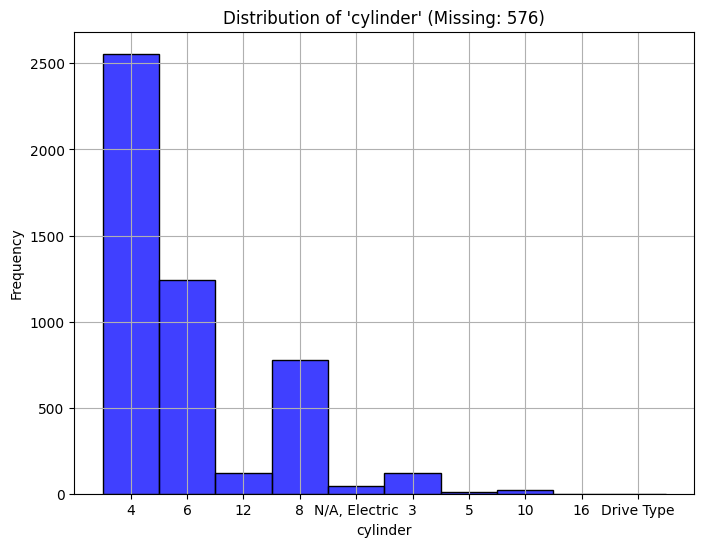

In [6]:
# explore cyclinder missing values 

def plot_feature_distribution(df, feature_name):

    """

    Plots the distribution of a feature, including the count of missing values.

    """

    # Check if the feature exists in the dataframe

    if feature_name not in df.columns:

        print(f"Feature '{feature_name}' not found in the dataframe.")

        return



    # Separate missing and non-missing values

    missing_count = df[feature_name].isnull().sum()

    print(f"Missing values in '{feature_name}': {missing_count}")



    # Plot the distribution

    plt.figure(figsize=(8, 6))

    sns.histplot(df[feature_name].dropna(), bins=8, kde=False, color='blue', edgecolor='black')

    plt.title(f"Distribution of '{feature_name}' (Missing: {missing_count})")

    plt.xlabel(feature_name)

    plt.ylabel("Frequency")

    plt.grid(True)

    plt.show()



# Example usage

# Assuming `df` is your dataframe and 'cylinder' is the feature

plot_feature_distribution(df, "cylinder")

In [7]:
from scipy.stats import skew, mode

import pandas as pd



def calculate_skewness(data, feature_name):

    """

    Calculates and interprets skewness, mean, median, and mode for a given feature in a DataFrame,

    skipping missing and non-numeric values.

    """ 

    # Drop missing and non-numeric values

    feature_data = pd.to_numeric(data[feature_name], errors='coerce').dropna()



    # Check if there is sufficient data

    if feature_data.empty:

        print(f"No numeric data available in '{feature_name}' to calculate statistics.")

        return



    # Calculate skewness

    skewness_value = skew(feature_data)



    # Print skewness and interpretation

    print(f"Skewness of '{feature_name}': {skewness_value:.3f}")

    if skewness_value > 1:

        print("The data is highly positively skewed.")

    elif skewness_value > 0.5:

        print("The data is moderately positively skewed.")

    elif skewness_value < -1:

        print("The data is highly negatively skewed.")

    elif skewness_value < -0.5:

        print("The data is moderately negatively skewed.")

    else:

        print("The data is approximately symmetric.")



    # Calculate and print mean, median, and mode

    mean_value = feature_data.mean()

    median_value = feature_data.median()

    mode_value = feature_data.mode()[0]  # Access the first mode



    print(f"Mean: {mean_value:.2f}, Median: {median_value:.2f}, Mode: {mode_value:.2f}")





calculate_skewness(df, "cylinder")


Skewness of 'cylinder': 1.400
The data is highly positively skewed.
Mean: 5.36, Median: 4.00, Mode: 4.00


### Handle incorrect values



Here we want to analyze the colums given insights noted after imoorting and fix any incorrent discrepancies.

#### Price : 



To ensure consistency, we need to standardize all prices to a common currency, here we'll use USD, for a uniform target variable. This will help avoid discrepancies and improve the accuracy of any predictive modeling

In [8]:
def apply_price_adj(price):

    """

    Converts a price string with a currency code into USD.

    """

    try:

        # Extract the currency code (first 3 characters)

        currency_code = price[:3].strip()

        # Extract the price string (everything after the currency code) and remove commas

        price_str = price[4:].replace(',', '').strip()

        # Convert price to float

        price_value = float(price_str)



        # Currency conversion rates as of 20 Nov 2024

        conversion_rates = {

            'AED': 0.27,   # 1 AED = 0.27 USD

            'KWD': 3.28,   # 1 KWD = 3.28 USD

            'OMR': 2.60,   # 1 OMR = 2.60 USD

            'BHD': 2.65,   # 1 BHD = 2.65 USD

            'QAR': 0.25,   # 1 QAR = 0.25 USD

            'SAR': 0.27,   # 1 SAR = 0.27 USD

            'EGP': 0.021   # 1 EGP = 0.021 USD

        }



        # Convert to USD if the currency code is valid

        if currency_code in conversion_rates:

            price_in_dollars = price_value * conversion_rates[currency_code]

            return round(price_in_dollars, 3)  # Round to three decimal places

        else:

            # Return NaN if the currency code is not recognized

            return float('nan')



    except (ValueError, IndexError):

        # Log and return NaN for invalid input or parsing errors

        return float('nan')



# Apply the function to replace the 'price' column values 

df['price'] = df['price'].apply(apply_price_adj)



# Drop rows where 'price' is NaN

df.dropna(subset=['price'], inplace=True)



# Save the cleaned DataFrame to a CSV file

df.to_csv('/kaggle/working/output3.csv', index=False)

print(len(df))


4979


#### Engine Capacity :

To ensure consistency, we need to standardize all engine capacities to liters and see we would need to convernt any valus in cubic centimerts to litres.

In [9]:
def apply_engine_adj(capacity):

    """

    Standardizes engine capacity to liters.

    If the value is greater than 1000, it is assumed to be in cubic centimeters (cc) and converted to liters.

    Otherwise, it is treated as already in liters.

    """

    try:

        # Convert to float for comparison

        engine_capacity = float(capacity)



        # Check if the value is larger than 1000

        if engine_capacity > 1000:

            engine_capacity = engine_capacity / 1000  # Convert cc to liters

        return round(engine_capacity, 2)  # Return value in liters, rounded to 2 decimals



    except (ValueError, TypeError):

        # Return NaN for invalid input or parsing errors

        return float('nan')





# Apply the function to replace the 'engine' column values 

df['engine_capacity'] = df['engine_capacity'].apply(apply_engine_adj)



# Drop rows where 'engine_capacity' is NaN

df.dropna(subset=['engine_capacity'], inplace=True)



# Save the cleaned DataFrame to a CSV file

df.to_csv('/kaggle/working/output4.csv', index=False)

print (len(df))

4978


#### Cylinder:

We will apply feature extranction here, for electric cars there is no cylinders , so we will add a column to mark if electric or not. In the cylider column if electric we will set to 0.




**Why 0?**



For most vehicles, cylinder counts are typically 3, 4, 6, 8, 10 or 12, using a negative value does not overlap with valid cylinder counts (e.g., 3, 4, 6, 8, etc.).

It explicitly indicates the absence of a conventional cylinder count, making it interpretable as "no cylinders."

In [10]:
def apply_cylinder_adj(capacity):

    """

    Adjusts the cylinder values. If the value is 'Electric' or 'N/A', it returns -1.

    """

    try:

        # Handle Electric and N/A cases

        if capacity in ['N/A, Electric']:

            return 0

          # Return numeric values as they are

        return float(capacity)

    except (ValueError, TypeError):

        # Return NaN for invalid inputs

        return float('nan')



# Apply the function to adjust the 'cylinder' column

df['cylinder'] = df['cylinder'].apply(apply_cylinder_adj)



# replace missing values with mode 

df['cylinder'] = pd.to_numeric(df['cylinder'], errors='coerce')  

mode_value = df['cylinder'].mode()[0]

df['cylinder'].fillna(mode_value, inplace=True)



# Save the cleaned DataFrame to a CSV file

df.to_csv('/kaggle/working/output5.csv', index=False)



print (len(df))




4978


/tmp/ipykernel_30/3199184581.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cylinder'].fillna(mode_value, inplace=True)


#### Horse Power:



Replace Single, Double, Triple with their standard values

In [11]:
def apply_horse_adj(capacity):

    """

    Adjusts the horsepower values. If the value matches 'Single', 'Double', or 'Triple',

    it replaces them with their corresponding horsepower values These values are averages taken from online sources. 

    Otherwise, numeric values remain unchanged.

    """

    horsepower_dict = {

        'Single': 283,

        'Double': 422.0,

        'Triple': 810.0

    }

    

    try:

        return float(capacity)

    except (ValueError, TypeError): # if not already numeric

        # Map known strings to their corresponding horsepower values

        return horsepower_dict.get(capacity, float('nan'))  # NaN for unrecognized strings



# Apply the function to adjust the 'horse_power' column

df['horse_power'] = df['horse_power'].apply(apply_horse_adj)



# Drop rows with NaN in 'horse_power' (invalid entries)

df.dropna(subset=['horse_power'], inplace=True)



# Save the cleaned DataFrame to a CSV file

df.to_csv('/kaggle/working/output6.csv', index=False)

print (len(df))

4978


#### Speed:



Remove any non-numeric values.

In [12]:
def apply_top_speed_adj(speed):

    """

    Cleans and standardizes the top_speed values.

    If the value is non-numeric (e.g., 'N/A', 'Unknown'), it is converted to NaN.

    Otherwise, it is treated as a valid numeric value.

    """

    try:

        # Attempt to convert the value to a float

        return float(speed)

    except (ValueError, TypeError):

        # Return NaN for invalid input or parsing errors

        return float('nan')





# Apply the function to replace the 'top_speed' column values

df['top_speed'] = df['top_speed'].apply(apply_top_speed_adj)



# Drop rows where 'top_speed' is NaN

df.dropna(subset=['top_speed'], inplace=True)



# Save the cleaned DataFrame to a CSV file

df.to_csv('/kaggle/working/output7.csv', index=False)

print (len(df))

4696


#### Seats:



We need to extract seats into their numeric values:



Note : reaching this here some values that were already invalid like floats (1.4, 2.5) and large values (150), were already removed since there has been multiple issue with that records entry.

In [13]:
def apply_seats_adj(seats_string):

    """

    Extracts the number of seats from a string assuming this format '5 Seater'.

    """

    try:

        # Split the string and extract the first part as an integer

        return int(seats_string.split()[0])

    except (ValueError, AttributeError, IndexError):

        # Return NaN for invalid or unparsable values

        return float('nan')



# Apply the function to the 'seats' column

df['seats'] = df['seats'].apply(apply_seats_adj)



# Drop rows where 'seats' is NaN

df.dropna(subset=['seats'], inplace=True)



# Save the cleaned DataFrame to a CSV file

df.to_csv('/kaggle/working/output8.csv', index=False)

print (len(df))


4622


#### Summary:



The current number of records is 4622, the original was 6308. We lost around 26% of the data, we will continue and assume acceptable. The original data had 1329 records missing price (target), that is 21% of the data that can not be used for a supervised learning problem like regression which we attemp to solve. So in other words, we lost 5% in the data cleaning for the data with correct targets.

In [14]:
print (len(df))

4622


### Encode Categorical


**Perform one-hot encoding for country.**

In [15]:
def encode_countries(df):

    # One-hot encode the 'country' column

    df_encoded = pd.get_dummies(df, columns=['country'], dtype=int, drop_first=True)    

    

    return df_encoded



df = encode_countries(df)

print (df.head())

                             car name     price  engine_capacity  cylinder  \
2    Suzuki Jimny 2021 1.5L Automatic  26671.95              1.5       4.0   
5       Honda HR-V 2021 1.8 i-VTEC EX  25740.45              1.8       4.0   
8   Renault Koleos 2021 2.5L LE (4WD)  31563.00              2.5       4.0   
10         Suzuki Jimny 2021 1.5L M/T  24808.95              1.5       4.0   
11      Honda HR-V 2021 1.8 i-VTEC DX  19530.45              1.8       4.0   

    horse_power  top_speed  seats    brand  country_egypt  country_ksa  \
2         102.0      145.0    4.0   suzuki              0            1   
5         140.0      190.0    5.0    honda              0            1   
8         170.0      199.0    5.0  renault              0            1   
10        102.0      145.0    4.0   suzuki              0            1   
11        140.0      190.0    5.0    honda              0            1   

    country_kuwait  country_oman  country_qatar  country_uae  
2                0     

**Perform Target encoding for country**



Note: What is target encoding? 



[Article on Comparing Performances of Encoding Schemes on Regression with Cross-validation](http://https://www.linkedin.com/pulse/comparing-performances-encoding-schemes-regression-imran-khan-jb3xc/)



Also see:

[1](https://towardsdatascience.com/benchmarking-categorical-encoders-9c322bd77ee8)

[2](https://medium.com/anolytics/all-you-need-to-know-about-encoding-techniques-b3a0af68338b)









* Mean encoding involves replacing each category with the mean value of the target variable for that category. This method can be very effective, especially for supervised learning tasks, but it can lead to overfitting if not managed properly

* When to use: It is suitable for categorical features exhibiting a **high number of categories**. 

* Because we wil later use regularization techniques, this will be safe to use.

*  Target encoding leverages the relationship between categorical variables and the target variable, making it a powerful encoding technique when this relationship is significant.

* One of the significant drawbacks of target encoding is the potential for overfitting, especially when applied to small datasets. It suffers from the problem of target leakage as the target variable is used to directly encode the input feature and the same feature is used to fit a model on the target variable.

* -> This is important to note because this type of encoding should only be applied on the training data after the split



Correct Approach -> Fit the Encoder Only on Training Data:



The encoder learns the target means for each category in the training data, and then  we use the fitted encoder to apply the same encoding to validation and test datasets.


In [16]:
from sklearn.model_selection import train_test_split 

import category_encoders as ce



def encode_brand(train_df):

    # Initialize the MeanEncoder

    mean_encoder = ce.TargetEncoder()

    

    # Fit the encoder on the training data

    mean_encoder.fit(train_df['brand'], train_df['price'])

    

    # Encode the 'brand' column

    train_df['brand'] = mean_encoder.transform(train_df[['brand']])['brand'].round(2)

    

    # Normalize the encoded 'brand' column using z-score normalization

    scaler = StandardScaler()

    train_df['brand'] = scaler.fit_transform(train_df[['brand']])

    

    return train_df, mean_encoder, scaler


### Normalize Numeric


#### Z-Score normalization 



Best for many advatages and reasons.

In [17]:
from sklearn.preprocessing import StandardScaler 

numeric_features = ['engine_capacity', 'cylinder', 'horse_power', 'seats', 'top_speed']



# Use the z-score normalization 

scaler = StandardScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])



df.to_csv('/kaggle/working/output9.csv', index=False)

### Split Data:



A commin split that is used here is 60% for training, 20% for validation, and 20% for testing.


In [18]:
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split



# Shuffle the dataset

df_shuffled = shuffle(df, random_state=42) # note that 42 is a widely used convention but can be anything -> this is used for consistent reproducability of the data



# Split the data into training (60%) and temp (40%)

train_data, temp_data = train_test_split(df_shuffled, test_size=0.4, random_state=42)



# Split the temp data into validation and testing 

val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)



# Output the sizes of each split to verify

print (len(train_data))

print (len(val_data))

print(len(test_data))



# remember to encode and normalize brand here 

train_data,encoder,scaler = encode_brand(train_data)



# Transform and normalize validation and test data

val_data['brand'] = encoder.transform(val_data[['brand']])['brand']

val_data['brand'] = scaler.transform(val_data[['brand']])



test_data['brand'] = encoder.transform(test_data[['brand']])['brand']

test_data['brand'] = scaler.transform(test_data[['brand']])




2773
924
925


In [19]:
# Save the train data DataFrame to a CSV file

train_data.to_csv('/kaggle/working/outputf.csv', index=False)

val_data.to_csv('/kaggle/working/outputff.csv', index=False)

**Extra : Visulaizing correlation between features**

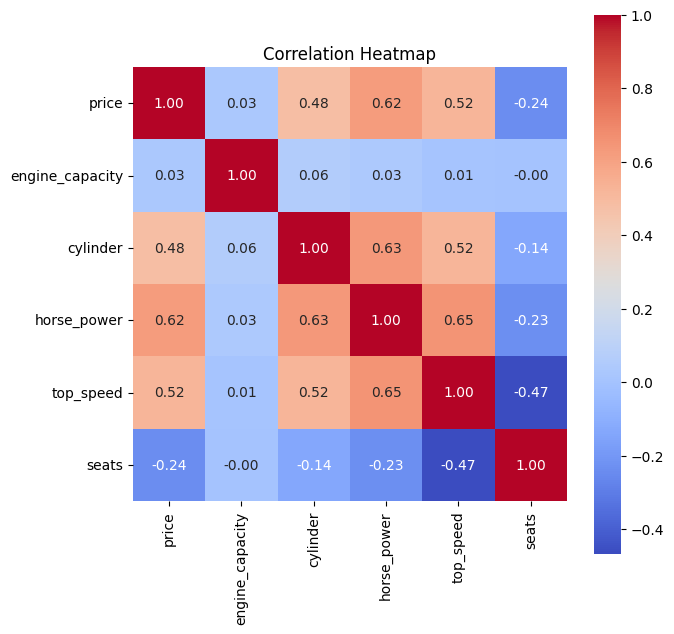

In [20]:


f_num = ['price', 'engine_capacity', 'cylinder', 'horse_power', 'top_speed', 'seats']



# Filter the dataset to include only the selected numerical columns

dataset_corr = df[f_num]



# Compute the correlation matrix

correlation_matrix = dataset_corr.corr()



# Plot the heatmap

plt.figure(figsize=(7, 7))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)

plt.title('Correlation Heatmap')

plt.show()

# 3. Building Regression Models 

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np



# Utility Functions for all models to prepare for use of models



def set_up_features():

    global X_train, y_train, X_val, y_val, X_test, y_test  # Declare variables as global



    # Define features (X) and target (y) for training, validation, and test sets

    X_train = train_data.drop(columns=['car name', 'price'])  

    y_train = train_data['price']



    X_val = val_data.drop(columns=['car name', 'price'])  

    y_val = val_data['price']



    X_test = test_data.drop(columns=['car name', 'price'])  

    y_test = test_data['price']







def evaluate_model(y_val_predicted):

    global y_val

    

    # Evaluate the model

    mse = mean_squared_error(y_val, y_val_predicted)

    r2 = r2_score(y_val, y_val_predicted)

    mae = mean_absolute_error(y_val, y_val_predicted)



    print (f"On Validation")

    print(f"Mean Squared Error: {mse}")

    print(f"R^2 Score: {r2}")

    print(f"Mean Absolute Error: {mae}")

    

    return mse, r2, mae





def test_model(y_test_predicted):

    global y_test

    

    # Evaluate the model

    mse = mean_squared_error(y_test, y_test_predicted)

    r2 = r2_score(y_test, y_test_predicted)

    mae = mean_absolute_error(y_test, y_test_predicted)



    print (f"On Test")

    print(f"Mean Squared Error: {mse}")

    print(f"R^2 Score: {r2}")

    print(f"Mean Absolute Error: {mae}")

    

    return mse, r2, mae

    



def print_metrics (mse, r2, mae):    

    print(f"Mean Squared Error: {mse}")

    print(f"R^2 Score: {r2}")

    print(f"Mean Absolute Error: {mae}")


# To plot the relationship between the predicted vaues and true values for a given model

def plot_predictions_VS_true_Values(predicted_values, true_values): 
    
    # Create the scatter plot
    
    plt.figure(figsize=(8, 6))
    
    plt.scatter(true_values, predicted_values, color='blue', label='Predictions')
    
    plt.plot([min(true_values), max(true_values)], 
             [min(true_values), max(true_values)], 
             color='red', linestyle='--', label='Perfect Predictions')
    
    plt.xlabel('True values', fontsize=12)
    
    plt.ylabel('Predicted Values', fontsize=12)
    
    plt.title(' Model Predicted values vs. true Values', fontsize=14)
    
    plt.legend()
    
    plt.show()




def export_model(y_predicted, name):

    global test_data, y_test

    # Combine 'car name', original 'price', and predicted 'price' into a DataFrame

    results = pd.DataFrame({

        'car name': test_data['car name'],

        'original_price': y_test,

        'predicted_price': y_predicted

    })

    

    # Save the DataFrame to a CSV file

    results.to_csv(f'{name}_test_predictions.csv', index=False)  

    print(f"Predictions saved to '{name}_test_predictions.csv'")





set_up_features()

## Linear Models

### Simple Model



This was just developed as a test to test data and linear model.

In [22]:
from sklearn.linear_model import LinearRegression



def simple_linear_model(X_train, y_train, X_val, X_test):  

    # Initialize the Linear Regression model

    model = LinearRegression()

    

    # Train the model on the training data

    model.fit(X_train, y_train)





    # Evaluate the model on the validation data

    y_val_predicted = model.predict(X_val)

    

    # Evaluate the model on the test data

    y_test_predicted = model.predict(X_test)

  

    return y_val_predicted,y_test_predicted

    



y_val_predicted_linear, y_test_predicted_linear = simple_linear_model(X_train, y_train, X_val, X_test)

mse,r2,mae = evaluate_model(y_val_predicted_linear)

export_model (y_test_predicted_linear, 'simple_linear')

On Validation
Mean Squared Error: 1337964979.8493295
R^2 Score: 0.608805959724009
Mean Absolute Error: 27067.96028213425
Predictions saved to 'simple_linear_test_predictions.csv'


### Closed-form solution

On Validation
Mean Squared Error: 1337964979.849323
R^2 Score: 0.608805959724011
Mean Absolute Error: 27067.96028213427


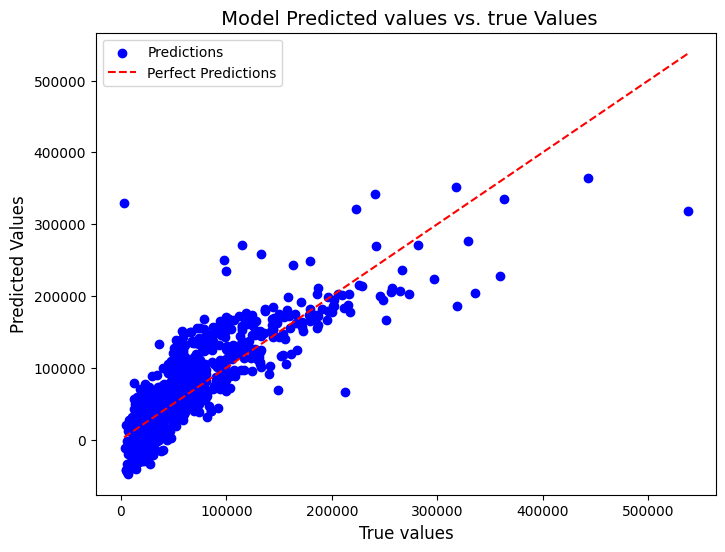

Predictions saved to 'closed_form_test_predictions.csv'


In [24]:


import numpy as np



def closed_form_model(X_train, y_train, X_val, X_test):



    # add bias feature 

    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

    X_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))

    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

     

    # Closed-form solution for linear regression

    # beta = (X^T * X)^(-1) * X^T * y

    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train





    # Make predictions on validation set

    y_val_predicted = X_val @ beta

    

    # Make predictions on test set

    y_test_predicted = X_test @ beta

    

    return y_val_predicted,y_test_predicted





y_val_predicted_closed, y_test_predicted_closed = closed_form_model(X_train, y_train, X_val, X_test)

mse,r2,mae = evaluate_model(y_val_predicted_closed)

plot_predictions_VS_true_Values(y_val_predicted_closed, y_val)

export_model (y_test_predicted_linear, 'closed_form')


### Gradient descent 

On Validation
Mean Squared Error: 1245792227.9125733
R^2 Score: 0.6357554178761624
Mean Absolute Error: 26868.301594440334
Predictions saved to 'gradient_descent_test_predictions.csv'


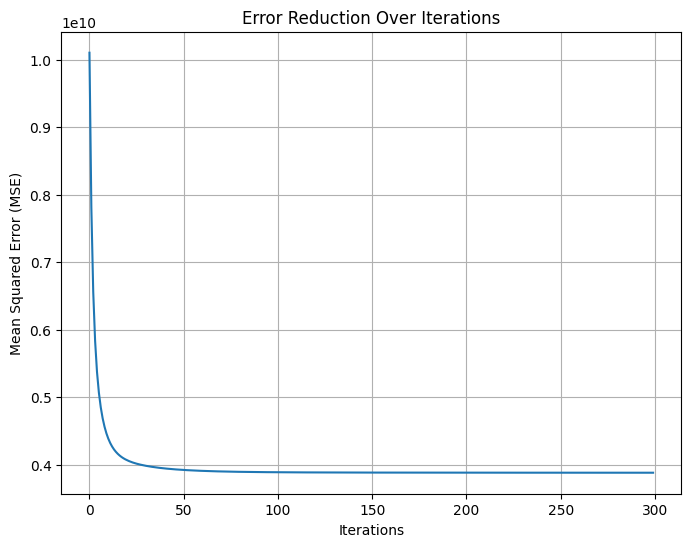

In [25]:
import numpy as np

import matplotlib.pyplot as plt





# find linear regression with visualizing

def gradient_descent_model(X_train, y_train, X_val,X_test, alpha , num_iterations):



    # add bias feature 

    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

    X_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))

    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))



    num_samples = X_train.shape[0]  # Number of samples 

    num_features = X_train.shape[1]  # Number of features or weights

    

    w = np.random.randn(num_features)  # Initialize initial weights randomly -> we have 13 weights 

    

    errors = []  # To store MSE at each iteration to visualize





    for t in range(num_iterations):

        # find predictions

        y_pred = X_train @ w

        

        # Compute gradient which equal to derivative 

        gradient = -(1 / num_samples) * (X_train.T @ (y_train - y_pred))

        

        # Update weights based on gradient and alpha

        w = w - alpha * gradient

        

        # Calculate MSE and store it 

        error = (1 / (2 * num_samples)) * np.sum((y_train - y_pred) ** 2)

        errors.append(error)





    # Predict on the validation set using the final weights

    y_val_predicted = X_val @ w

    

    # Predict on the test set using the final weights

    y_test_predicted = X_test @ w

    

    return y_val_predicted, y_test_predicted, errors

    





alpha = 0.1

num_iterations = 300



y_val_predicted_gradient, y_test_predicted_gradient, errors = gradient_descent_model(X_train, y_train, X_val, X_test, alpha, num_iterations)

mse,r2,mae = evaluate_model(y_val_predicted_gradient)

export_model (y_test_predicted_gradient, 'gradient_descent')





# Visualize Error over Iterations

plt.figure(figsize=(8, 6))

plt.plot(range(num_iterations), errors)

plt.title("Error Reduction Over Iterations")

plt.xlabel("Iterations")

plt.ylabel("Mean Squared Error (MSE)")

plt.grid(True)

plt.show()






### Ridge Regression

On Validation
Mean Squared Error: 1337964934.5330694
R^2 Score: 0.6088059729735718
Mean Absolute Error: 27067.960049940473
On Validation
Mean Squared Error: 1337964922.6667144
R^2 Score: 0.6088059764430551
Mean Absolute Error: 27067.95998913897
On Validation
Mean Squared Error: 1337964907.69302
R^2 Score: 0.6088059808210621
Mean Absolute Error: 27067.95991241609
On Validation
Mean Squared Error: 1337964888.7984185
R^2 Score: 0.6088059863454633
Mean Absolute Error: 27067.95981560287
On Validation
Mean Squared Error: 1337964864.9561334
R^2 Score: 0.6088059933164679
Mean Absolute Error: 27067.959693438446
On Validation
Mean Squared Error: 1337964834.8705552
R^2 Score: 0.6088060021128856
Mean Absolute Error: 27067.9595392844
On Validation
Mean Squared Error: 1337964796.9068532
R^2 Score: 0.6088060132127082
Mean Absolute Error: 27067.959344763993
On Validation
Mean Squared Error: 1337964749.0021746
R^2 Score: 0.6088060272190725
Mean Absolute Error: 27067.95909930727
On Validation
Mean Squar

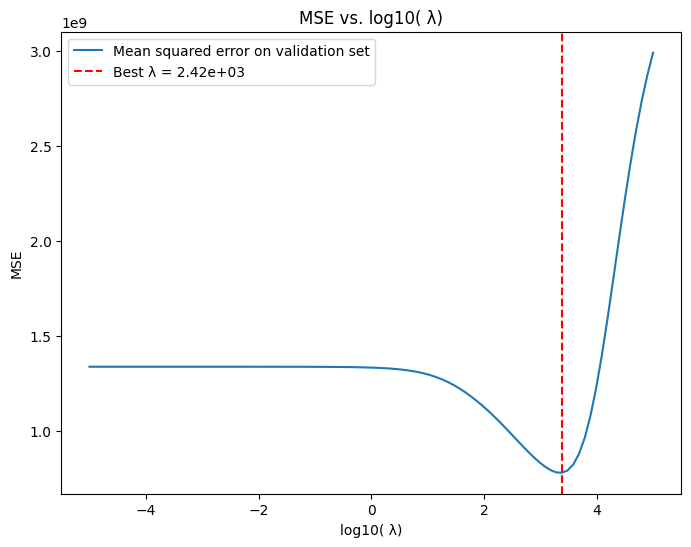

Best value for lambda is: 2420.1282647943835

final
On Validation
Mean Squared Error: 780895703.9859693
R^2 Score: 0.7716818077623853
Mean Absolute Error: 18911.86448490216
Predictions saved to 'ridge_test_predictions.csv'

 The relation between the predicted values and actual vaues on the validation set 


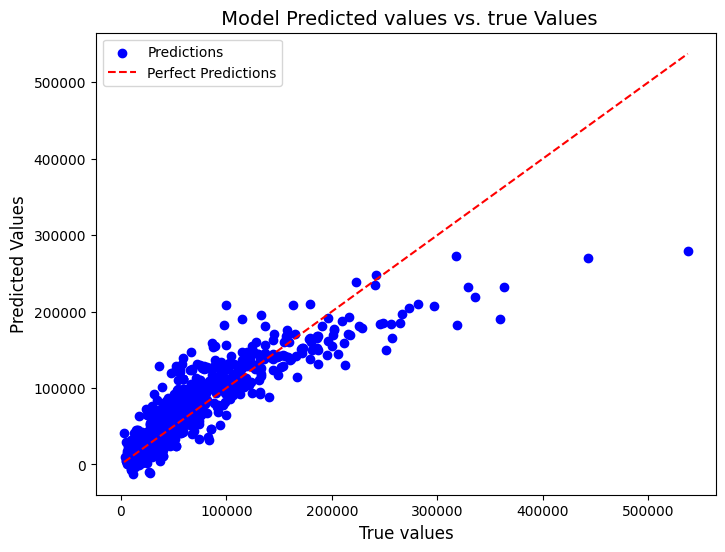

In [26]:
import numpy as np





def ridge_regularization_model (X_train, y_train, X_val, X_test, alpha):

    

    # Add bias term to training, validation, and test sets

    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

    X_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))

    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))



    num_samples = X_train.shape[0]  # Number of samples 

    num_features = X_train.shape[1]  # Number of features or weights



    ## Perform Training:

    # Create an identity matrix 

    I = np.identity(num_features)

    # Execlude the bias feature from regularization

    I[0,0] = 0



    # Solution to ridge regression 

    weights = np.linalg.inv(X_train.T.dot(X_train) + (alpha * I)).dot(X_train.T).dot(y_train)



    # make final prediction on validation set using weights

    y_val_predicted = X_val.dot(weights) 

 

    # make final prediction on test set using weights

    y_test_predicted = X_test.dot(weights) 



    return y_val_predicted, y_test_predicted





# Grid search to find the best value of lambda 

def best_lambda (X_train, y_train, X_val, y_val):

    

    lambdaValues = np.logspace(-5,5,100) # test values from 10^-5 to 10^5 

    MSE_Values = [] 



    for l in lambdaValues:

        # Perform training on the train data and prediction on validation data

        y_val_predicted, _ = ridge_regularization_model(X_train, y_train, X_val, X_val, l)



        # Evaluate model between validation and true labels

        mse_error = evaluate_model(y_val_predicted)[0]  

        MSE_Values.append(mse_error)



        

    # find the index of the lowest mean squared error

    index = np.argmin(MSE_Values)



    best_value = lambdaValues[index]

    # Plot the relation between lambda and the mean squared error on the validation set

    plt.figure(figsize=(8, 6))

    plt.plot(np.log10(lambdaValues), MSE_Values, label='Mean squared error on validation set')

    plt.axvline(np.log10(best_value), color='r', linestyle='--', label=f'Best λ = {best_value:.2e}')

    plt.xlabel('log10( λ)')

    plt.ylabel('MSE')

    plt.title('MSE vs. log10( λ)')

    plt.legend()

    plt.show()



    print(f"Best value for lambda is: {best_value}")

    return best_value 





alpha = best_lambda (X_train, y_train, X_val, y_val)





y_val_predicted_ridge, y_test_predicted_ridge = ridge_regularization_model (X_train, y_train, X_val, X_test,alpha)

print(f'\nfinal')

mse,r2,mae = evaluate_model(y_val_predicted_ridge)

export_model (y_test_predicted_ridge, 'ridge')

print("\n The relation between the predicted values and actual vaues on the validation set ")

plot_predictions_VS_true_Values(y_val_predicted_ridge, y_val)



### LASSO Regression

Lasso stands for Least Absolute Shrinkage and Selection Operator. It is one of regularization techniques, which are typically used to prevent overfitting.  


Grid search is used to find the optimal value for λ which is a hyperparameter that controls the strenght of penality term.


Best Value for λ is {'alpha': 1000}
On Validation
Mean Squared Error: 1152940216.0854936
R^2 Score: 0.6629034779535494
Mean Absolute Error: 25628.79770671632

 The relation between the predicted values and actual vaues on the validation set 


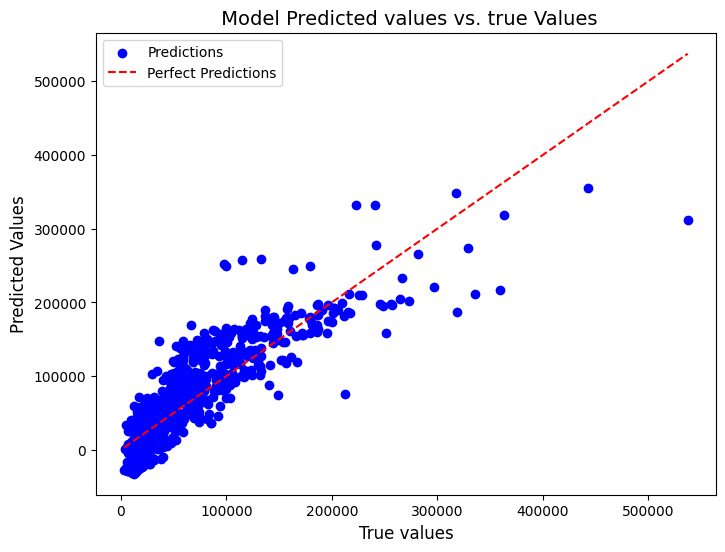

Predictions saved to 'lasso_test_predictions.csv'


In [27]:
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV 





def LASSO_regularization_model (X_train, y_train,X_val,X_test):



    # use built-in library

    lasso = Lasso()



    # Define differnt values of alpha to find the best value 

    parameter_values  = {'alpha': [0.0001,0.001, 0.001, 0.01, 1, 10, 100, 1000]}



    # apply grid search to find the best value for the parameter alpha

    lasso = GridSearchCV(lasso, parameter_values, cv = 10, n_jobs = -1)

 

    lasso.fit(X_train, y_train)



    # Evaluate the model on the validation set  

    y_val_predicted =lasso.predict(X_val)

    

    # Evaluate the model on the test set  

    y_test_predicted = lasso.predict(X_test)

    print("Best Value for λ is",lasso.best_params_ )

    return y_val_predicted, y_test_predicted 




# call LASSO regularization


y_val_predicted_lasso, y_test_predicted_lasso = LASSO_regularization_model (X_train, y_train,X_val,X_test)

mse,r2,mae = evaluate_model(y_val_predicted_lasso)

print("\n The relation between the predicted values and actual vaues on the validation set ")

plot_predictions_VS_true_Values(y_val_predicted_lasso, y_val)


export_model (y_test_predicted_lasso, 'lasso')




## Noninear Models

### Polynomials

Polynomial with degree 1
On Validation
Mean Squared Error: 780895703.9859694
R^2 Score: 0.7716818077623852
Mean Absolute Error: 18911.86448490216
-----------
Polynomial with degree 2
On Validation
Mean Squared Error: 1964665717.0150409
R^2 Score: 0.42557127338460676
Mean Absolute Error: 21823.480894029275
-----------
Polynomial with degree 3
On Validation
Mean Squared Error: 166555178282.47626
R^2 Score: -47.69738304252712
Mean Absolute Error: 28882.103779870526
-----------
Polynomial with degree 4
On Validation
Mean Squared Error: 10980663014499.514
R^2 Score: -3209.524934692191
Mean Absolute Error: 123235.85933846167
-----------
Test with poly 2
On Validation
Mean Squared Error: 1964665717.0150409
R^2 Score: 0.42557127338460676
Mean Absolute Error: 21823.480894029275

 The relation between the predicted values and actual vaues with dgree 2 on the  


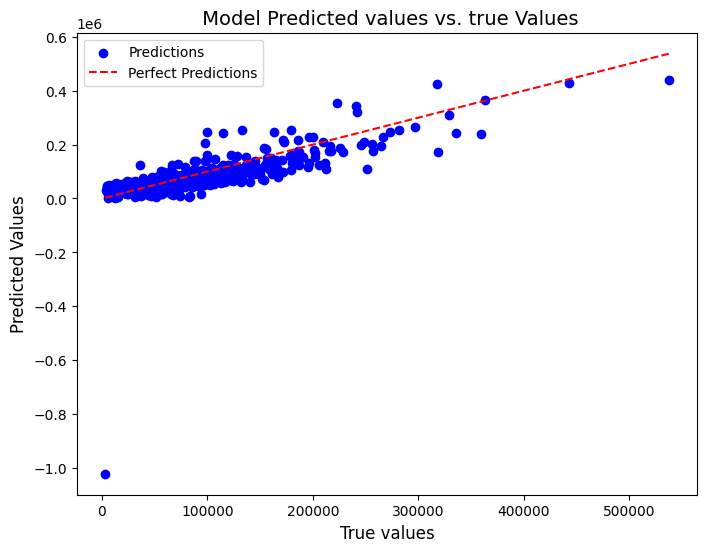

Predictions saved to 'poly_test_predictions.csv'


In [28]:


from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression





# note : this part takes some time to run 

def polynomial_model (X_train, y_train, X_val, X_test, degree):



    global alpha

    # transform features into a higher dimension

    polynomial_features = PolynomialFeatures(degree)

    X_train_poly = polynomial_features.fit_transform(X_train)

    X_val_poly = polynomial_features.fit_transform(X_val)

    X_test_poly = polynomial_features.fit_transform(X_test)



    # we can use any linear regression model ex:

    #  simple_linear_model(X_train, y_train, X_val, X_test)

    #  closed_form_model(X_train, y_train, X_val, X_test)

    #  ridge_regularization_model (X_train, y_train, X_val, X_test, alpha):



    

    # Evaluate the model on the validation set & test set  

    #y_val_predicted, y_test_predicted = simple_linear_model(X_train_poly, y_train, X_val_poly, X_test_poly)

    y_val_predicted, y_test_predicted = ridge_regularization_model(X_train_poly, y_train, X_val_poly, X_test_poly, alpha)

    

    return y_val_predicted, y_test_predicted 



    



# Do a loop for 9 polynomials

for i in range(1, 5):

    print(f'Polynomial with degree {i}')

    y_val_predicted_poly, y_test_predicted_poly = polynomial_model (X_train, y_train, X_val,X_test, i)

    mse,r2,mae = evaluate_model(y_val_predicted_poly)

    print ('-----------')



# try this 

print (f'Test with poly 2')

y_val_predicted_poly, y_test_predicted_poly = polynomial_model (X_train, y_train, X_val,X_test, 2)

mse,r2,mae = evaluate_model(y_val_predicted_poly)

print("\n The relation between the predicted values and actual vaues with dgree 2 on the  ")

plot_predictions_VS_true_Values(y_val_predicted_poly, y_val)

export_model (y_test_predicted_poly, 'poly')


### Radial Basis Function RBF 

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVR



# faster model for RBF

def RBF_model_param(X_train, y_train, X_val, X_test, C, gamma):

  

    RBF_Regression = SVR(kernel='rbf', C=C, gamma=gamma)

    

    RBF_Regression.fit(X_train, y_train)



    # Predict on validation and test sets

    y_val_predicted = RBF_Regression.predict(X_val)



     # Evaluate the model on the test set  

    y_test_predicted = RBF_Regression.predict (X_test) 

    

    return y_val_predicted, y_test_predicted

    



# faster model for RBF

def RBF_model_param_val(X_train, y_train, X_val, C, gamma):

  

    RBF_Regression = SVR(kernel='rbf', C=C, gamma=gamma)

    

    RBF_Regression.fit(X_train, y_train)



    # Predict on validation and test sets

    y_val_predicted = RBF_Regression.predict(X_val)



    return y_val_predicted





def RBF_model (X_train, y_train,X_val, X_test):



    RBF_Regression = SVR(kernel='rbf')

    

    parameters = {'C':[0.001, 0.01, .01, 1, 10, 100, 1000,10000,100000], 

                 'gamma': [0.001, 0.001, 0.01, 1, 10, 100, 1000]}

    

    RBF = GridSearchCV(RBF_Regression, parameters, cv=5, n_jobs=-1)

    RBF.fit(X_train, y_train)

    print("Best Values:", RBF.best_params_)



    # Evaluate the model on the validation set  

    y_val_predicted = RBF.predict(X_val)

    

    # Evaluate the model on the test set  

    y_test_predicted = RBF.predict (X_test) 



    # Extract the best parameters

    best_params = RBF.best_params_

    best_C = best_params['C']

    best_gamma = best_params['gamma']

    

    return y_val_predicted, y_test_predicted , best_C, best_gamma





y_val_predicted_RBF, y_test_predicted_RBF, C, gamma = RBF_model (X_train, y_train, X_val,X_test)

mse,r2,mae = evaluate_model(y_val_predicted_RBF)

print("\n The relation between the predicted values and actual vaues on the validation set ")


plot_predictions_VS_true_Values(y_val_predicted_RBF, y_val)



export_model (y_test_predicted_RBF, 'RBF')


# 4. Feature Extraction

Here we will use the polynomial with ridge linear regression to optimize.

In [ ]:
# note : this part takes some time to run 



def get_model(X_train, y_train, X_val):

    global C, gamma

    print (C)

    print (gamma)

    return RBF_model_param_val(X_train, y_train, X_val, C, gamma)





def feature_extraction(X_train, y_train, X_val):

    """

    Perform forward selection to find the best set of features,

    ensuring at least two features are selected.

    """



    features = X_train.columns.tolist()



    added_features = set()  # Track selected features

    best_features = set()  # Track the final best set of features

    current_r2 = float('-inf')  # Start with the smallest possible R^2 value



    for i in range(len(features)):

        best_feature = None

        temp_features = added_features.copy()  # Reset temp_features to the current selected set



        for feature in features:

            if feature not in added_features:  # Feature not already selected

                # Temporarily add the feature to the set

                temp_features.add(feature)



                # Train model and evaluate on validation

                X_temp_train = X_train[list(temp_features)]

                X_temp_val = X_val[list(temp_features)]



                y_val_predicted = get_model(X_temp_train, y_train, X_temp_val)

                mse, r2, mae = evaluate_model(y_val_predicted)



                # Ensure at least 2 features or check if the feature improves the model

                if r2 > current_r2 or len(added_features) < 2:

                    current_r2 = r2

                    best_feature = feature

                    best_features = temp_features.copy()



        if best_feature is not None:

            # Add the best feature to the selected set

            added_features.add(best_feature)



    print(f"Final selected features: {best_features}")

    return best_features







# Perform feature extraction

selected_features = feature_extraction(X_train, y_train, X_val)



print("-------------------------------------")

print("Selected Features:", selected_features)



X_selcted_train = X_train[list(selected_features)]

X_selcted_val = X_val[list(selected_features)]

X_selcted_test = X_test[list(selected_features)]





y_val_predicted_best, y_test_predicted_best = RBF_model_param (X_selcted_train , y_train, X_selcted_val,X_selcted_test, C, gamma)

mse,r2,mae = evaluate_model(y_val_predicted_best)

export_model (y_test_predicted_best, 'best')






# 5. Final Performance Test

In [ ]:
print(f'final evaluation')

test_model(y_test_predicted_best)